In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
import sys
from scipy.spatial.distance import pdist, squareform

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'


In [3]:
LIB = TOP+'src/models/'
if not LIB in sys.path: 
    sys.path.insert(0,LIB)


In [4]:
from model_functions import *

In [5]:
df = pd.read_excel(interim_dir+'tsca_medoids_070823.xlsx')

In [6]:
df.head()

,Unnamed: 0,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,...,level2_cluster_centroid,cluster_d,lvl2_centroid,lvl2_centroid2,lvl2_analogues,lvl2_Dist,final_centroid,final_dist,group,group_str
0,0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,...,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID4063036,0.000000,"('Acetylides', nan)","('Acetylides', nan)"
1,1,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,...,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID4063036,0.434783,"('Acetylides', nan)","('Acetylides', nan)"
2,2,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,...,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID4063036,0.409091,"('Acetylides', nan)","('Acetylides', nan)"
3,3,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,...,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID4063036,0.045455,"('Acetylides', nan)","('Acetylides', nan)"
4,4,DTXSID1061233,"1,7-Octadiyne",871-84-1,DSOJWVLXZNRKCS-UHFFFAOYSA-N,"Octa-1,7-diyne",C#CCCCCC#C,"InChI=1S/C8H10/c1-3-5-7-8-6-4-2/h1-2H,5-8H2",C8H10,106.168,...,NaN,NaN,NaN,NaN,NaN,NaN,DTXSID4063036,0.500000,"('Acetylides', nan)","('Acetylides', nan)"


In [7]:
df.columns

Index(['Unnamed: 0', 'dtxsid', 'PREFERRED_NAME', 'CASRN', 'INCHIKEY',
       'IUPAC_NAME', 'smiles', 'INCHI_STRING', 'MOLECULAR_FORMULA',
       'AVERAGE_MASS',
       ...
       'level2_cluster_centroid', 'cluster_d', 'lvl2_centroid',
       'lvl2_centroid2', 'lvl2_analogues', 'lvl2_Dist', 'final_centroid',
       'final_dist', 'group', 'group_str'],
      dtype='object', length=117)

In [8]:
df.drop('Unnamed: 0', axis =1 , inplace = True)

In [9]:
results = {}
for i, group in df.groupby('ClassyFire'):
    try:
        a = mk_fp(group)
    except Exception as error:
        print(error)
    else:
        results[i] = a

RDKit ERROR: [11:57:11] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [11:57:11] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [11:57:14] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [11:57:14] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [11:57:14] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [11:57:14] Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [11:57:16] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [11:57:16] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [11:57:16] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [11:57:16] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [11:57:16] Explicit valence for atom # 0 O, 4, is greater than permitted
RDKit ERROR: [11:57:17] SMILES Parse Error: syntax er

In [10]:
distances = {}
for k,v in results.items():
    a = distance_matrix(results[k])
    distances[k] = a

In [11]:
d = {k:len(v) for k,v in distances.items()} 

In [12]:
lt65 = {k:v for k,v in d.items() if v <= 65}


In [13]:
lt65.keys()

dict_keys(['Acetylides', 'Alkaloids and derivatives', 'Allenes', 'Benzimidazoles', 'Benzofurans', 'Benzopyrans', 'Benzothiazoles', 'Diazinanes', 'Dioxanes', 'Epoxides', 'Glycerolipids', 'Heteroaromatic compounds', 'Homogeneous metal compounds', 'Hydrocarbon derivatives', 'Indanes', 'Indoles and derivatives', 'Inorganic salts', 'Isoindoles and derivatives', 'Keto acids and derivatives', 'Lactones', 'Lignans, neolignans and related compounds', 'Lipids and lipid-like molecules', 'Miscellaneous inorganic compounds', 'Nucleosides, nucleotides, and analogues', 'Organic 1,3-dipolar compounds', 'Organic oxides', 'Organic oxoanionic compounds', 'Organic oxygen compounds', 'Organic phosphonic acids and derivatives', 'Organic salts', 'Organic sulfonic acids and derivatives', 'Organophosphorus compounds', 'Oxanes', 'Oxazinanes', 'Phenol esters', 'Piperidines', 'Steroids and steroid derivatives', 'Triazines', 'Triphenyl compounds'])

#### We have already determin MaxMin for the lte65 where feasible. We have not performed this for the remaining gte65 substances
- Filter the dataframe for only those substances that meet the gte65 condition

In [14]:
gte65 = {k:v for k,v in d.items() if v >65}

In [15]:
gt65_df = df[~df['ClassyFire'].isin(lt65.keys())]

In [16]:
gt65_df[['dtxsid','smiles','qsar_ready_smiles','Kingdom',
 'Superclass',
 'Class',
 'ClassyFire',
 'cluster_centroid',
 'centroid',
 'centroid2',
 'analogues',
 'Dist',
 'lt65_picks',
 'level2_cluster_centroid',
 'cluster_d',
 'lvl2_centroid',
 'lvl2_centroid2',
 'lvl2_analogues',
 'lvl2_Dist',
 'final_centroid',
 'final_dist', 'group', 'group_str']]

,dtxsid,smiles,qsar_ready_smiles,Kingdom,Superclass,Class,ClassyFire,cluster_centroid,centroid,centroid2,...,level2_cluster_centroid,cluster_d,lvl2_centroid,lvl2_centroid2,lvl2_analogues,lvl2_Dist,final_centroid,final_dist,group,group_str
46,DTXSID3061134,CC1=C2C=CC=CC2=CC2=CC=CC=C12,CC1C2=CC=CC=C2C=C2C=CC=CC2=1,Organic compounds,Benzenoids,Anthracenes,Anthracenes,NaN,NaN,DTXSID8044464,...,centroid,1.0,DTXSID3061134,DTXSID3061134,DTXSID3061134,0.000000,DTXSID3061134,0.000000,"('Anthracenes', 1.0)","('Anthracenes', 1.0)"
47,DTXSID9063083,OC1=C2C=CC=CC2=NC2=C3C(=O)C4=CC=CC=C4C(=O)C3=C...,OC1C2=CC=C3C(=C2N=C2C=CC=CC2=1)C(=O)C1=CC=CC=C...,Organic compounds,Benzenoids,Anthracenes,Anthracenes,NaN,NaN,DTXSID8044464,...,NaN,1.0,NaN,DTXSID3061134,DTXSID9063083,0.850746,DTXSID3061134,0.850746,"('Anthracenes', 1.0)","('Anthracenes', 1.0)"
48,DTXSID4061628,N#CC1=C2C=CC=CC2=C(C#N)C2=CC=CC=C12,N#CC1C2=CC=CC=C2C(C#N)=C2C=CC=CC2=1,Organic compounds,Benzenoids,Anthracenes,Anthracenes,NaN,NaN,DTXSID8044464,...,NaN,1.0,NaN,DTXSID3061134,DTXSID4061628,0.777778,DTXSID3061134,0.777778,"('Anthracenes', 1.0)","('Anthracenes', 1.0)"
49,DTXSID1060057,OC1=C2C(O)=C3C=CC=CC3=C(O)C2=C(O)C=C1,OC1C=CC(O)=C2C=1C(O)=C1C=CC=CC1=C2O,Organic compounds,Benzenoids,Anthracenes,Anthracenes,NaN,NaN,DTXSID8044464,...,NaN,1.0,NaN,DTXSID3061134,DTXSID1060057,0.804878,DTXSID3061134,0.804878,"('Anthracenes', 1.0)","('Anthracenes', 1.0)"
50,DTXSID1066237,OC1=C2C=CC=CC2=C(O)C2=C1C(=O)CCC2=O,OC1C2=C(C(=O)CCC2=O)C(O)=C2C=CC=CC=12,Organic compounds,Benzenoids,Anthracenes,Anthracenes,NaN,NaN,DTXSID8044464,...,NaN,1.0,NaN,DTXSID3061134,DTXSID1066237,0.822222,DTXSID3061134,0.822222,"('Anthracenes', 1.0)","('Anthracenes', 1.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14126,DTXSID90889301,CC[C@@H](C)[C@H]1CCCC2=CC=CN=C12,CC(CC)C1CCCC2=CC=CN=C21,Organic compounds,Organoheterocyclic compounds,Quinolines and derivatives,Quinolines and derivatives,NaN,NaN,DTXSID3020887,...,NaN,5.0,NaN,DTXSID30889300,DTXSID90889301,0.000000,DTXSID30889300,0.000000,"('Quinolines and derivatives', 5.0)","('Quinolines and derivatives', 5.0)"
14127,DTXSID4067806,O=CC1=CC2=C3N(CCCC3=C1)CCC2,O=CC1=CC2CCCN3CCCC(=C1)C3=2,Organic compounds,Organoheterocyclic compounds,Quinolines and derivatives,Quinolines and derivatives,NaN,NaN,DTXSID3020887,...,NaN,5.0,NaN,DTXSID30889300,DTXSID4067806,0.884058,DTXSID30889300,0.884058,"('Quinolines and derivatives', 5.0)","('Quinolines and derivatives', 5.0)"
14128,DTXSID6047444,CC1=CC2=C(NCCC2)C=C1,CC1=CC2CCCNC=2C=C1,Organic compounds,Organoheterocyclic compounds,Quinolines and derivatives,Quinolines and derivatives,NaN,NaN,DTXSID3020887,...,NaN,5.0,NaN,DTXSID30889300,DTXSID6047444,0.840580,DTXSID30889300,0.840580,"('Quinolines and derivatives', 5.0)","('Quinolines and derivatives', 5.0)"
14129,DTXSID60888922,O=C1C(CCC1=CC1=CC2=C3N(CCCC3=C1)CCC2)=CC1=CC2=...,O=C1C(CCC1=CC1=CC2CCCN3CCCC(=C1)C3=2)=CC1=CC2C...,Organic compounds,Organoheterocyclic compounds,Quinolines and derivatives,Quinolines and derivatives,NaN,NaN,DTXSID3020887,...,NaN,5.0,NaN,DTXSID30889300,DTXSID60888922,0.897436,DTXSID30889300,0.897436,"('Quinolines and derivatives', 5.0)","('Quinolines and derivatives', 5.0)"


In [17]:
gt65_df[gt65_df['ClassyFire'] == 'Anthracenes']['cluster_d'].unique()

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [18]:
def content_max2(df,  k = None):
    content = {}
    a,b = k
    tdf = df[(df['ClassyFire'] == a) & (df['cluster_d'] ==b)]
    content['t_dict'] = {k:Chem.MolFromSmiles(v) for k,v in zip(tdf['dtxsid'], tdf['smiles'])}
    content['fp_dict'] = [AllChem.GetMorganFingerprintAsBitVect(i, 3, 1024) for i in content['t_dict'].values()]
    content['nfp_dict'] = len(content['fp_dict'])
    content['t_index'] = {k:v for k,v in enumerate(content['t_dict'].keys())} 
    content['k'] = k
    return content

In [19]:
#content_max2(gt65_df, k = ('Anthracenes', 1))

In [20]:
gte_keys = {k for k,v in gt65_df.groupby(['ClassyFire', 'cluster_d'])}

In [21]:
gte_summaries = []
for k in list(gte_keys):
    try:
        gte_summaries.append(content_max2(gt65_df, k))
    except Exception as error:
        print(k)

In [22]:
len(gte_summaries)

141

In [23]:
g_keys = [ gte_summaries[i]['k'] for i in range(len(gte_summaries))]

In [24]:
len(g_keys)

141

In [25]:
[e for e in list(gte_keys) if e not in  g_keys ]

[]

In [26]:
len(g_keys)

141

In [27]:
len(gte_keys)

141

In [28]:
from rdkit import Chem
from rdkit import SimDivFilters,DataStructs

In [29]:
def picker_func(fps, n1, start_with  = 1, n2 = 3, label = None, fps_index = None):
    picker_dict = {}
    mmp = SimDivFilters.MaxMinPicker()
    picker_dict['label'] = label
    picker_dict['indices'] = mmp.LazyBitVectorPick(fps,n1, start_with+n2, [0])
    picker_dict['diverse_chems'] = [fps_index[x] for x in picker_dict['indices']]
    return picker_dict


In [30]:
#gte_summaries[98]


In [31]:
picker_lst = []
for i in range(len(gte_summaries)):
    if gte_summaries[i]['nfp_dict'] > 5:
        picker_lst.append(picker_func(gte_summaries[i]['fp_dict'], n1 =gte_summaries[i]['nfp_dict'], n2 = 1, label = gte_summaries[i]['k'], fps_index = gte_summaries[i]['t_index']  ))

In [33]:
len(picker_lst)

139

In [34]:
gt65_df[(gt65_df['ClassyFire'] == 'Anthracenes') & (gt65_df['cluster_d'] == 3)][['final_centroid', 'final_dist','cluster_d', 'dtxsid']].head()

,final_centroid,final_dist,cluster_d,dtxsid
72,DTXSID1026293,0.000000,3.0,DTXSID1026293
73,DTXSID1026293,0.552239,3.0,DTXSID9063033
74,DTXSID1026293,0.258621,3.0,DTXSID4070798
75,DTXSID1026293,0.573529,3.0,DTXSID8065080
76,DTXSID1026293,0.608108,3.0,DTXSID1066578


Create one big list of all picked chemicals to tag to the final_df dataframe. Add the existing centroids originally calculated for these groups

In [35]:
mylst2 = []
for i in range(len(picker_lst)):
    mylst2.append(picker_lst[i]['diverse_chems'])


In [36]:
mylst2 = [e for a in mylst2 for e in a]

In [37]:
len(mylst2)

278

In [38]:
df['gt65_picks'] = df['dtxsid'].apply(lambda x: 1 if x in mylst2 else 0)

In [39]:
df['gt65_picks'].value_counts()

0    13969
1      278
Name: gt65_picks, dtype: int64

In [40]:
189 + 278

467

In [41]:
df['diverse_picks'] = df[['lt65_picks', 'gt65_picks']].apply(lambda x: 1 if (x['lt65_picks'] | x['gt65_picks'] == 1) else 0, axis = 1)

In [42]:
df.diverse_picks.value_counts()

0    13780
1      467
Name: diverse_picks, dtype: int64

In [43]:
df.columns

Index(['dtxsid', 'PREFERRED_NAME', 'CASRN', 'INCHIKEY', 'IUPAC_NAME', 'smiles',
       'INCHI_STRING', 'MOLECULAR_FORMULA', 'AVERAGE_MASS',
       'MONOISOTOPIC_MASS',
       ...
       'lvl2_centroid', 'lvl2_centroid2', 'lvl2_analogues', 'lvl2_Dist',
       'final_centroid', 'final_dist', 'group', 'group_str', 'gt65_picks',
       'diverse_picks'],
      dtype='object', length=118)

In [44]:
kp_selections = pd.read_excel(external_dir+'tsca_medoids_16Nov2022.xlsx', sheet_name = 'full_tsca_data')

In [45]:
kp_selections.columns[-15:]

Index(['ncc1', 'ncc2', 'ncc3', 'ncc4', 'ncc5', 'chnm', 'casn', 'active.count',
       'tested.count', 'active.pct', 'centroid.true', 'phospho.substruct',
       'silico.substruct', 'screenability', 'preliminary.selection'],
      dtype='object')

#### Screenability depends on:
- VP, 
- Physical form being liquid or solid, 
- Vendor count > 1, 
- not tested in ToxCast
- Lipinski failures <3, 
- phospho and insilico being O, 
- and elements just being CHNOPS + Halogens (no Boron and no Si-O)

In [46]:
#'physical_form','VENDOR_COUNT','LogVP_pred','nbLipinskiFailures','physical_form',

In [47]:
kp_selections = kp_selections[['dtxsid', 'tested.count','phospho.substruct', 'silico.substruct']]

In [48]:
df2 = pd.merge(df, kp_selections, on = 'dtxsid', how = 'left')

In [49]:
import re

In [50]:
df2.head()

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,lvl2_Dist,final_centroid,final_dist,group,group_str,gt65_picks,diverse_picks,tested.count,phospho.substruct,silico.substruct
0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125201,...,NaN,DTXSID4063036,0.000000,"('Acetylides', nan)","('Acetylides', nan)",0,1,NaN,0,0
1,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,82.078250,...,NaN,DTXSID4063036,0.434783,"('Acetylides', nan)","('Acetylides', nan)",0,0,NaN,0,0
2,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,120.093900,...,NaN,DTXSID4063036,0.409091,"('Acetylides', nan)","('Acetylides', nan)",0,0,NaN,0,0
3,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,208.219101,...,NaN,DTXSID4063036,0.045455,"('Acetylides', nan)","('Acetylides', nan)",0,0,NaN,0,0
4,DTXSID1061233,"1,7-Octadiyne",871-84-1,DSOJWVLXZNRKCS-UHFFFAOYSA-N,"Octa-1,7-diyne",C#CCCCCC#C,"InChI=1S/C8H10/c1-3-5-7-8-6-4-2/h1-2H,5-8H2",C8H10,106.168,106.078250,...,NaN,DTXSID4063036,0.500000,"('Acetylides', nan)","('Acetylides', nan)",0,0,NaN,0,0


In [51]:
df2['MOLECULAR_FORMULA'][0]

'C9H16'

In [52]:
p = re.compile(r"[A-Za-z]+")

In [53]:
elements = {k:p.findall(a) for k,a in zip(df2['dtxsid'], df2['MOLECULAR_FORMULA'])}

In [54]:
elements['DTXSID2025210']

['C', 'H', 'NO']

In [55]:
df2[df2['dtxsid'] == 'DTXSID2025210']['MOLECULAR_FORMULA']

114    C20H13NO4
Name: MOLECULAR_FORMULA, dtype: object

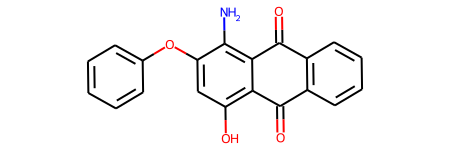

In [56]:
Chem.MolFromSmiles(df2[df2['dtxsid'] == 'DTXSID2025210']['smiles'].values[0])

In [57]:
mychems = {k:Chem.MolFromSmiles(v) for k,v in zip(df2['dtxsid'], df2['smiles'])}

RDKit ERROR: [12:54:37] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [12:54:37] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [12:54:38] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [12:54:38] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [12:54:38] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [12:54:38] Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [12:54:38] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [12:54:38] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [12:54:38] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [12:54:38] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [12:54:38] Explicit valence for atom # 0 O, 4, is greater than permitted
RDKit ERROR: [12:54:38] SMILES Parse Error: syntax er

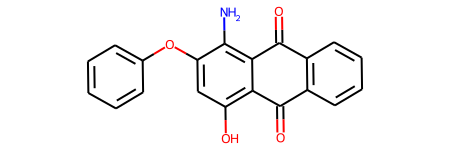

In [58]:
mychems['DTXSID2025210']

In [59]:
mychems = {k:v for k,v in mychems.items() if v is not None}

In [60]:
myhetatoms = {}
for k in mychems.keys():
    try:
        myhetatoms[k] = { atom.GetSymbol() for atom in mychems[k].GetAtoms() }
    except Exception as error:
        print(error)


In [61]:
#[list(e) for e in myhetatoms.values()]

In [62]:
myhelist = [list(e) for e in myhetatoms.values()]

In [63]:
unique_elements = list(set([item for subitem in myhelist for item in subitem]))

In [64]:
#unique_elements

In [65]:
myhetatoms = {k:list(v) for k,v in myhetatoms.items()}

In [66]:
#myhetatoms

In [67]:
elements_df = pd.DataFrame(list(myhetatoms.items()), columns = ['dtxsid', 'elements'])

allowed elements = CHNOPS + Halogens

In [68]:
allowed_elements = ['C','H', 'N','O', 'P', 'S', 'F', 'Cl', 'Br', 'I']

In [69]:
all(x in allowed_elements for x in elements_df['elements'][20])

True

In [70]:
snops = []
for e in elements_df['elements']:
    if all(x in  allowed_elements for x in e):
        snops.append(1)
    else:
        snops.append(0)

In [71]:
np.unique(snops, return_counts = True)

(array([0, 1]), array([ 1574, 12620]))

In [72]:
#all(item in List2 for item in List1)

In [73]:
elements_df['elements_permitted'] = snops

In [74]:
elements_df[elements_df['dtxsid'] == 'DTXSID101014639']

,dtxsid,elements,elements_permitted
619,DTXSID101014639,"[O, C, Si]",0


In [75]:
silicon = []
for e in elements_df['elements']:
    if all(x in e for x in ['Si', 'O']):
        silicon.append(1)
    else:
        silicon.append(0)

In [76]:
np.unique(silicon, return_counts = True)

(array([0, 1]), array([13771,   423]))

In [77]:
elements_df['silicon_containing'] = silicon

In [78]:
elements_df[elements_df['dtxsid'] == 'DTXSID101014639']

,dtxsid,elements,elements_permitted,silicon_containing
619,DTXSID101014639,"[O, C, Si]",0,1


In [79]:
elements_df[elements_df['silicon_containing'] ==1]

,dtxsid,elements,elements_permitted,silicon_containing
619,DTXSID101014639,"[O, C, Si]",0,1
747,DTXSID60889232,"[O, C, Si]",0,1
819,DTXSID0026129,"[O, C, Si]",0,1
820,DTXSID10884636,"[O, C, Si]",0,1
823,DTXSID2044717,"[O, C, Si]",0,1
...,...,...,...,...
12969,DTXSID30888757,"[O, C, Si]",0,1
13165,DTXSID00889231,"[O, C, Si]",0,1
13241,DTXSID40889230,"[O, C, Si]",0,1
13379,DTXSID60864862,"[O, C, Si]",0,1


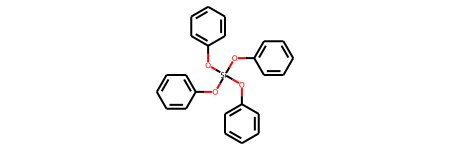

In [80]:
Chem.MolFromSmiles(df2[df2['dtxsid'] == 'DTXSID0026129']['smiles'].values[0])

In [81]:
df3 = pd.merge(df2, elements_df, on = 'dtxsid', how = 'left')

In [82]:
df3['physical_form'].unique()

array(['liquid', 'gas', 'solid', nan], dtype=object)

In [83]:
mask = (df3['elements'].notnull()) & (df3['elements_permitted'] ==1) & (df3['silicon_containing'] ==0) & (df3['tested.count'].isnull()) &\
       (df3['VENDOR_COUNT'] > 1) &\
       (df3['physical_form'].isin( ['liquid', 'solid'])) &\
       (df3['LogVP_pred'] < 2) &\
       (df3['nbLipinskiFailures'] < 3) &\
       (df3['phospho.substruct'] ==0)  &\
       (df3['silico.substruct'] ==0)
                                     

In [84]:
screenable = df3[mask]['dtxsid'].tolist()

In [85]:
df3['screenable'] = df3['dtxsid'].apply(lambda x: 1 if x in screenable else 0)

In [86]:
df3.screenable.value_counts()

1    7565
0    6682
Name: screenable, dtype: int64

Constrained inventory comprises 7565 substances

In [87]:
screenable_df = df3[df3['screenable'] ==1]

In [88]:
screenable_df.shape

(7565, 125)

In [386]:
#df3['group'] = df3[['ClassyFire','cluster_d']].apply(tuple, axis = 1)
#df3['group_str']=[str(e) for e in df3['group'] ]

In [92]:
df.group_str.nunique()

180

In [93]:
screenable_df.group_str.nunique()

160

In [94]:
160/180

0.8888888888888888

In [95]:
results_subcats = {}
for i, group in screenable_df.groupby('group_str'):
    try:
        a = mk_fp(group)
    except Exception as error:
        print(error)
    else:
        results_subcats[i] = a

In [96]:
distances_subcats = {}
for k,v in results_subcats.items():
    a = distance_matrix(results_subcats[k])
    distances_subcats[k] = a

In [97]:
centres = []
for i,group in screenable_df.groupby('group_str'):
    try:
        m = medoid_calc(distances_subcats[i])
        centres.append(m)
    except Exception as error:
        print(error)


In [98]:
len(centres)

160

In [99]:
screenable_df['screenable_centroid'] = screenable_df['dtxsid'].apply(lambda x: 'centroid' if x in centres else np.nan)

<ipython-input-99-51f26f3dd318>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screenable_df['screenable_centroid'] = screenable_df['dtxsid'].apply(lambda x: 'centroid' if x in centres else np.nan)


In [100]:
screenable_df.screenable_centroid.value_counts()

centroid    160
Name: screenable_centroid, dtype: int64

In [101]:
df4 = screenable_df.copy()

In [102]:
df_4 = df4.set_index('dtxsid')

In [103]:
members = {}

for i, group in df_4.groupby('group_str'):
    subset = group[['group_str', 'screenable_centroid']]
    try: 
        for x, y in subset.iterrows():
            a, b = y
            if b == 'centroid':
                #print(x)
                c = [distances_subcats[i][x].index, distances_subcats[i][x].values]
                members[x] = c
    except Exception as error:
            print(error)

In [104]:
cluster_members = pd.DataFrame(list(members.items()))
cluster_members.columns = ['screenable_centroid', 1]
cluster_members[['lvl2_analogues','lvl2_Dist']] = pd.DataFrame(cluster_members[1].tolist(), index= cluster_members.index)
cluster_members.drop([1], axis = 1, inplace = True)
cluster_members_1 = cluster_members.apply(pd.Series.explode)
cluster_members_1.head()

,screenable_centroid,lvl2_analogues,lvl2_Dist
0,DTXSID9061097,DTXSID4063036,0.045455
0,DTXSID9061097,DTXSID9061097,0.0
0,DTXSID9061097,DTXSID4061096,0.0
0,DTXSID9061097,DTXSID8072405,0.387097
0,DTXSID9061097,DTXSID0066955,0.517241


In [105]:
df4['screenable_centroid_id'] = df4.apply(lambda x: x['dtxsid'] if x['screenable_centroid'] == 'centroid' else np.nan, axis = 1)

In [106]:
df4 = df4.sort_values(by = ['group_str', 'screenable_centroid_id'], ascending = [True, False])

In [107]:
df4['screenable_centroid_id2'] = df4['screenable_centroid_id'].fillna(method = 'ffill')


In [108]:
df4

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,tested.count,phospho.substruct,silico.substruct,elements,elements_permitted,silicon_containing,screenable,screenable_centroid,screenable_centroid_id,screenable_centroid_id2
3,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,208.219101,...,NaN,0,0,[C],1.0,0.0,1,centroid,DTXSID9061097,DTXSID9061097
0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125201,...,NaN,0,0,[C],1.0,0.0,1,NaN,NaN,DTXSID9061097
5,DTXSID4061096,1-Tetradecyne,765-10-6,DZEFNRWGWQDGTR-UHFFFAOYSA-N,Tetradec-1-yne,CCCCCCCCCCCCC#C,InChI=1S/C14H26/c1-3-5-7-9-11-13-14-12-10-8-6-...,C14H26,194.362,194.203451,...,NaN,0,0,[C],1.0,0.0,1,NaN,NaN,DTXSID9061097
6,DTXSID8072405,"1,11-Hexadecadiyne",71673-32-0,GRDDITZXHDRNNP-UHFFFAOYSA-N,"Hexadeca-1,11-diyne",CCCCC#CCCCCCCCCC#C,InChI=1S/C16H26/c1-3-5-7-9-11-13-15-16-14-12-1...,C16H26,218.384,218.203451,...,NaN,0,0,[C],1.0,0.0,1,NaN,NaN,DTXSID9061097
7,DTXSID0066955,"1-Octyne, 8-chloro-",24088-97-9,HQHUHJPIECZMCX-UHFFFAOYSA-N,8-Chlorooct-1-yne,ClCCCCCCC#C,"InChI=1S/C8H13Cl/c1-2-3-4-5-6-7-8-9/h1H,3-8H2",C8H13Cl,144.640,144.070578,...,NaN,0,0,"[C, Cl]",1.0,0.0,1,NaN,NaN,DTXSID9061097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14240,DTXSID1074961,"Thymidine, 5'-O-[bis(4-methoxyphenyl)phenylmet...",40615-39-2,UBTJZUKVKGZHAD-UPRLRBBYSA-N,5'-O-[Bis(4-methoxyphenyl)(phenyl)methyl]thymi...,COC1=CC=C(C=C1)C(OC[C@H]1O[C@H](C[C@@H]1O)N1C=...,InChI=1S/C31H32N2O7/c1-20-18-33(30(36)32-29(20...,C31H32N2O7,544.604,544.220951,...,NaN,0,0,"[O, C, N]",1.0,0.0,1,NaN,NaN,DTXSID0060149
14242,DTXSID7070391,"1,1'-((Phenylmethylene)bis((2-methyl-4,1-pheny...",66085-68-5,WMIMXCPQTYMGDN-UHFFFAOYSA-N,"1,1'-{(Phenylmethylene)bis[(2-methyl-4,1-pheny...",CC1=CC(=CC=C1N=NC1=C2C=CC=CC2=CC=C1O)C(C1=CC=C...,InChI=1S/C41H32N4O2/c1-26-24-31(16-20-35(26)42...,C41H32N4O2,612.733,612.252526,...,NaN,0,0,"[O, C, N]",1.0,0.0,1,NaN,NaN,DTXSID0060149
14243,DTXSID70889405,"Oxirane, 2,2',2''-[methylidynetris(phenyleneox...",106253-69-4,WUULWDSQZQBRKW-UHFFFAOYSA-N,"3,3'-(2-Methyl-1,3-phenylene)bis(5-{[4-(bis{4-...",CC1=C(C=CC=C1N1CC(COC2=CC=C(C=C2)C(C2=CC=C(OCC...,InChI=1/C65H62N2O14/c1-41-60(66-29-54(80-64(66...,C65H62N2O14,1095.211,1094.420105,...,NaN,0,0,"[O, C, N]",1.0,0.0,1,NaN,NaN,DTXSID0060149
14244,DTXSID90886794,"3H-Pyrazol-3-one, 4,4'-[(phenylmethylene)bis[(...",66085-69-6,WXNBMYJCPCEWND-UHFFFAOYSA-N,"4,4'-{(Phenylmethylene)bis[(2-methyl-4,1-pheny...",CC1=NN(C(=O)C1N=NC1=CC=C(C=C1C)C(C1=CC=CC=C1)C...,InChI=1/C41H36N8O2/c1-26-24-31(20-22-35(26)42-...,C41H36N8O2,672.793,672.296122,...,NaN,0,0,"[O, C, N]",1.0,0.0,1,NaN,NaN,DTXSID0060149


In [109]:
mydict_ = {}
for i, group in df4.groupby('screenable_centroid_id2'):
    k = [n for n in group['screenable_centroid_id2'] if n != ' '][0]
    v = list(group['dtxsid'])
    mydict_[k] = v

In [110]:
len(list(mydict_.values()))

160

In [111]:
dist_ = []
for i, group in cluster_members_1.groupby('screenable_centroid'):
    a = cluster_members_1[(cluster_members_1['screenable_centroid'] == i) & (cluster_members_1['lvl2_analogues'].isin(mydict_[i]))]
    dist_.append(a)

In [112]:
dist_df = pd.concat([e for e in dist_])

In [113]:
df4_w = pd.merge(df4, dist_df[['lvl2_analogues', 'lvl2_Dist']], left_on = 'dtxsid', right_on = 'lvl2_analogues', how = 'left')

In [114]:
#df3_w.columns.tolist()

In [115]:
df4_w.rename(columns = {'lvl2_analogues_x' : 'lvl2_analogues', 'lvl2_Dist_x' : 'lvl2_Dist', 'lvl2_analogues_y' : 'screening_analogues' ,'lvl2_Dist_y' : 'screening_dist'  }, inplace = True)

In [116]:
df4_w.head()

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,silico.substruct,elements,elements_permitted,silicon_containing,screenable,screenable_centroid,screenable_centroid_id,screenable_centroid_id2,screening_analogues,screening_dist
0,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,208.219101,...,0,[C],1.0,0.0,1,centroid,DTXSID9061097,DTXSID9061097,DTXSID9061097,0.0
1,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125201,...,0,[C],1.0,0.0,1,NaN,NaN,DTXSID9061097,DTXSID4063036,0.045455
2,DTXSID4061096,1-Tetradecyne,765-10-6,DZEFNRWGWQDGTR-UHFFFAOYSA-N,Tetradec-1-yne,CCCCCCCCCCCCC#C,InChI=1S/C14H26/c1-3-5-7-9-11-13-14-12-10-8-6-...,C14H26,194.362,194.203451,...,0,[C],1.0,0.0,1,NaN,NaN,DTXSID9061097,DTXSID4061096,0.0
3,DTXSID8072405,"1,11-Hexadecadiyne",71673-32-0,GRDDITZXHDRNNP-UHFFFAOYSA-N,"Hexadeca-1,11-diyne",CCCCC#CCCCCCCCCC#C,InChI=1S/C16H26/c1-3-5-7-9-11-13-15-16-14-12-1...,C16H26,218.384,218.203451,...,0,[C],1.0,0.0,1,NaN,NaN,DTXSID9061097,DTXSID8072405,0.387097
4,DTXSID0066955,"1-Octyne, 8-chloro-",24088-97-9,HQHUHJPIECZMCX-UHFFFAOYSA-N,8-Chlorooct-1-yne,ClCCCCCCC#C,"InChI=1S/C8H13Cl/c1-2-3-4-5-6-7-8-9/h1H,3-8H2",C8H13Cl,144.640,144.070578,...,0,"[C, Cl]",1.0,0.0,1,NaN,NaN,DTXSID9061097,DTXSID0066955,0.517241


In [117]:
cats = df4_w['group_str'].unique().tolist()

In [118]:
len(cats)

160

In [119]:
def content_max(df,  k = None):
    content = {}
    tdf = df[df['group_str'] == k]
    content['t_dict'] = {k:Chem.MolFromSmiles(v) for k,v in zip(tdf['dtxsid'], tdf['smiles'])}
    content['fp_dict'] = [AllChem.GetMorganFingerprintAsBitVect(i, 3, 1024) for i in content['t_dict'].values()]
    content['nfp_dict'] = len(content['fp_dict'])
    content['t_index'] = {k:v for k,v in enumerate(content['t_dict'].keys())} 
    content['k'] = k
    
    return content


In [120]:
lte_summaries = []
for k in cats:
    try:
        lte_summaries.append(content_max(df4_w, k))
    except Exception as error:
        print(k)


In [121]:
def picker_func3(fps, n1, start_with  = 1, n2 = 3, label = None, fps_index = None):
    picker_dict = {}
    mmp = SimDivFilters.MaxMinPicker()
    picker_dict['label'] = label
    picker_dict['indices'] = mmp.LazyBitVectorPick(fps,n1, start_with+n2, [0])
    picker_dict['diverse_chems'] = [fps_index[x] for x in picker_dict['indices']]
    return picker_dict

In [122]:
picker_lst2 = []
for i in range(len(lte_summaries)):
    if lte_summaries[i]['nfp_dict'] > 5:
        picker_lst2.append(picker_func(lte_summaries[i]['fp_dict'], n1 =lte_summaries[i]['nfp_dict'], n2 = 2, label = lte_summaries[i]['k'], fps_index = lte_summaries[i]['t_index']  ))

In [136]:
len(picker_lst2)

146

In [124]:
mylst2_ = []
for i in range(len(picker_lst2)):
    mylst2_.append(picker_lst2[i]['diverse_chems'])


In [125]:
mylst2_ = [e for a in mylst2_ for e in a]

In [126]:
len(set(mylst2_))

438

In [131]:
tc = []
for i in range(0, len(picker_lst2)):
    tc.append(picker_lst2[i]['label'])

In [132]:
notes = [e for e in cats if e not in tc]

In [135]:
len(notes)

14

In [134]:
for i in range(len(lte_summaries)):
    if lte_summaries[i]['k'] in notes:
        print(lte_summaries[i]['k'], lte_summaries[i]['nfp_dict'])

('Alkaloids and derivatives', nan) 3
('Azobenzenes', 1.0) 4
('Azoles', 3.0) 4
('Azolidines', 1.0) 3
('Azolidines', 5.0) 4
('Benzenoids', 4.0) 5
('Homogeneous non-metal compounds', 3.0) 1
('Hydrocarbon derivatives', nan) 3
('Lignans, neolignans and related compounds', nan) 4
('Lipids and lipid-like molecules', nan) 1
('Organic oxygen compounds', nan) 4
('Organic phosphoric acids and derivatives', 3.0) 2
('Other', 3.0) 4
('Quinolines and derivatives', 1.0) 3


In [127]:
df4_w['MaxMin_selction_picks'] = df4_w['dtxsid'].apply(lambda x: 1 if x in mylst2_ else 0)

In [128]:
df4_w.MaxMin_selction_picks.value_counts()

0    7127
1     438
Name: MaxMin_selction_picks, dtype: int64

In [129]:
df4_w.rename(columns = {'MaxMin_selction_picks': 'MaxMin_selection_picks'}, inplace = True)

In [130]:
df4_w.columns

Index(['dtxsid', 'PREFERRED_NAME', 'CASRN', 'INCHIKEY', 'IUPAC_NAME', 'smiles',
       'INCHI_STRING', 'MOLECULAR_FORMULA', 'AVERAGE_MASS',
       'MONOISOTOPIC_MASS',
       ...
       'elements', 'elements_permitted', 'silicon_containing', 'screenable',
       'screenable_centroid', 'screenable_centroid_id',
       'screenable_centroid_id2', 'screening_analogues', 'screening_dist',
       'MaxMin_selection_picks'],
      dtype='object', length=131)

In [138]:
final_df = pd.merge(df3, df4_w[['dtxsid', 
       'screenable_centroid', 'screenable_centroid_id',
       'screenable_centroid_id2', 'screening_analogues', 'screening_dist',
       'MaxMin_selection_picks']], on = 'dtxsid', how = 'left')

In [139]:
final_df.columns.tolist()

filtered_df = final_df[['dtxsid',
 'PREFERRED_NAME',
 'CASRN',
 'INCHIKEY',
 'IUPAC_NAME',
 'smiles',
 'MolWeight','physical_form',
 'NCC',
 'VENDOR_COUNT',
 'IN_SIGMA-ALDRICH',
 'ClassyFire',
 'cluster_centroid',
 'centroid',
 'centroid2',
 'analogues',
 'Dist',
 'lt65_picks',
 'level2_cluster_centroid',
 'cluster_d',
 'lvl2_centroid',
 'lvl2_centroid2',
 'lvl2_analogues',
 'lvl2_Dist',
 'final_centroid',
 'final_dist',
 'gt65_picks',
 'diverse_picks',
 'screenable',
 'group',
 'group_str',
 'screenable_centroid',
 'screenable_centroid_id',
 'screenable_centroid_id2',
 'screening_analogues',
 'screening_dist',
 'MaxMin_selection_picks']]

In [141]:
writer = pd.ExcelWriter(interim_dir+'categorisatons_wscreening_constraints_080823_v1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.

final_df.to_excel(writer, sheet_name = 'All data')
filtered_df.to_excel(writer, sheet_name = 'Summary view')

writer.save()


In [7]:
final_df = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_080823_v1.xlsx', sheet_name = 'All data', index_col = [0])

In [8]:
final_df

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,elements,elements_permitted,silicon_containing,screenable,screenable_centroid,screenable_centroid_id,screenable_centroid_id2,screening_analogues,screening_dist,MaxMin_selection_picks
0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125201,...,['C'],1.0,0.0,1,NaN,NaN,DTXSID9061097,DTXSID4063036,0.045455,0.0
1,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,82.078250,...,['C'],1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,120.093900,...,['C'],1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,208.219101,...,['C'],1.0,0.0,1,centroid,DTXSID9061097,DTXSID9061097,DTXSID9061097,0.000000,1.0
4,DTXSID1061233,"1,7-Octadiyne",871-84-1,DSOJWVLXZNRKCS-UHFFFAOYSA-N,"Octa-1,7-diyne",C#CCCCCC#C,"InChI=1S/C8H10/c1-3-5-7-8-6-4-2/h1-2H,5-8H2",C8H10,106.168,106.078250,...,['C'],1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14242,DTXSID7070391,"1,1'-((Phenylmethylene)bis((2-methyl-4,1-pheny...",66085-68-5,WMIMXCPQTYMGDN-UHFFFAOYSA-N,"1,1'-{(Phenylmethylene)bis[(2-methyl-4,1-pheny...",CC1=CC(=CC=C1N=NC1=C2C=CC=CC2=CC=C1O)C(C1=CC=C...,InChI=1S/C41H32N4O2/c1-26-24-31(16-20-35(26)42...,C41H32N4O2,612.733,612.252526,...,"['O', 'C', 'N']",1.0,0.0,1,NaN,NaN,DTXSID0060149,DTXSID7070391,0.878049,0.0
14243,DTXSID70889405,"Oxirane, 2,2',2''-[methylidynetris(phenyleneox...",106253-69-4,WUULWDSQZQBRKW-UHFFFAOYSA-N,"3,3'-(2-Methyl-1,3-phenylene)bis(5-{[4-(bis{4-...",CC1=C(C=CC=C1N1CC(COC2=CC=C(C=C2)C(C2=CC=C(OCC...,InChI=1/C65H62N2O14/c1-41-60(66-29-54(80-64(66...,C65H62N2O14,1095.211,1094.420105,...,"['O', 'C', 'N']",1.0,0.0,1,NaN,NaN,DTXSID0060149,DTXSID70889405,0.920455,1.0
14244,DTXSID90886794,"3H-Pyrazol-3-one, 4,4'-[(phenylmethylene)bis[(...",66085-69-6,WXNBMYJCPCEWND-UHFFFAOYSA-N,"4,4'-{(Phenylmethylene)bis[(2-methyl-4,1-pheny...",CC1=NN(C(=O)C1N=NC1=CC=C(C=C1C)C(C1=CC=CC=C1)C...,InChI=1/C41H36N8O2/c1-26-24-31(20-22-35(26)42-...,C41H36N8O2,672.793,672.296122,...,"['O', 'C', 'N']",1.0,0.0,1,NaN,NaN,DTXSID0060149,DTXSID90886794,0.910112,0.0
14245,DTXSID3073052,"Phenol, 4,4'-[1-[4-[1-(4-hydroxyphenyl)-1-meth...",110726-28-8,WXYSZTISEJBRHW-UHFFFAOYSA-N,"4,4'-(1-{4-[2-(4-Hydroxyphenyl)propan-2-yl]phe...",CC(C)(C1=CC=C(O)C=C1)C1=CC=C(C=C1)C(C)(C1=CC=C...,"InChI=1S/C29H28O3/c1-28(2,21-8-14-25(30)15-9-2...",C29H28O3,424.540,424.203845,...,"['O', 'C']",1.0,0.0,1,NaN,NaN,DTXSID0060149,DTXSID3073052,0.849057,0.0


In [11]:
final_df[final_df['screenable'] ==1]['group_str'].nunique()

160

In [12]:
final_df['group_str'].nunique()

180

In [13]:
categories_meet_condition = final_df[final_df['screenable'] ==1]['group_str'].unique().tolist()

In [14]:
all_categories = final_df['group_str'].unique().tolist()

In [15]:
categories_do_not_meet_condition = set(all_categories) - set(categories_meet_condition)

In [16]:
categories_do_not_meet_condition

{"('Allenes', nan)",
 "('Homogeneous metal compounds', nan)",
 "('Homogeneous non-metal compounds', 1.0)",
 "('Homogeneous non-metal compounds', 2.0)",
 "('Homogeneous non-metal compounds', 4.0)",
 "('Inorganic salts', nan)",
 "('Miscellaneous inorganic compounds', nan)",
 "('Mixed metal/non-metal compounds', 1.0)",
 "('Mixed metal/non-metal compounds', 2.0)",
 "('Mixed metal/non-metal compounds', 3.0)",
 "('Mixed metal/non-metal compounds', 4.0)",
 "('Mixed metal/non-metal compounds', 5.0)",
 "('Organic acids and derivatives', 1.0)",
 "('Organic phosphoric acids and derivatives', 1.0)",
 "('Organic phosphoric acids and derivatives', 2.0)",
 "('Organic salts', nan)",
 "('Organometallic compounds', 1.0)",
 "('Organometallic compounds', 2.0)",
 "('Organometallic compounds', 3.0)",
 "('Organometallic compounds', 4.0)",
 nan}

In [17]:
final_df[final_df['group_str'].isnull()]

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,elements,elements_permitted,silicon_containing,screenable,screenable_centroid,screenable_centroid_id,screenable_centroid_id2,screening_analogues,screening_dist,MaxMin_selection_picks
3327,DTXSID30894010,"Zinc 3,5-di(tert-butyl)salicylate",42405-40-3,HCOFMIWUFBMIPV-UHFFFAOYSA-L,"Bis[3,5-di-tert-butyl-2-(hydroxy-kappaO)benzoa...",[H][O]1C2=C(C=C(C=C2C(=O)[O-][Zn++]11[O-]C(=O)...,"InChI=1S/2C15H22O3.Zn/c2*1-14(2,3)9-7-10(13(17...",C30H42O6Zn,564.040,562.227281,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3328,DTXSID40893135,"1-Butanol, 2,2-bis[(2-propenyloxy)methyl]-, zi...",111083-78-4,PKPWBQMGJMYVOW-UHFFFAOYSA-K,-,CCC12C[O-][Zr+4]([O-]C3=CC(N)=CC=C3)([O-]C3=CC...,InChI=1S/C12H21O3.3C6H7NO.Zr/c1-4-7-14-10-12(6...,C30H39N3O6Zr,628.881,627.188590,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4809,DTXSID401014690,Yttrium oxalate (2:3),867-68-5,IBSDADOZMZEYKD-UHFFFAOYSA-H,Yttrium ethanedioate (2/3),O=C1[O-][Y+3]2([O-]C1=O)[O-]C1=[O][Y+3]3([O-]C...,"InChI=1S/3C2H2O4.2Y/c3*3-1(4)2(5)6;;/h3*(H,3,4...",C6O12Y2,441.866,441.750660,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4810,DTXSID101014689,Tris(oxalato)digadolinium,867-64-1,SQORATIMOBOFKR-UHFFFAOYSA-H,Gadolinium ethanedioate (2/3),O=C1[O-][Gd+3]2([O-]C1=O)[O-]C1=[O][Gd+3]3([O-...,"InChI=1S/3C2H2O4.2Gd/c3*3-1(4)2(5)6;;/h3*(H,3,...",C6Gd2O12,578.550,579.787200,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4811,DTXSID90893908,"Manganese, tris[mu-(acetato-kappaO:kappaO')]bi...",2020407-65-0,YLNPJYJPYWMOIL-UHFFFAOYSA-K,Bis(mu-acetato-kappaO:kappaO')(mu-acetato-kapp...,CC1=[O][Mn]2345[O-]C(C)=[O][Mn+3]67([O-]1)([O]...,InChI=1S/2C9H21N3.3C2H4O2.2Mn/c2*1-10-4-6-11(2...,C24H51Mn2N6O6,629.584,629.263096,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4812,DTXSID70893986,(T-4)-Bis[3-[[(carboxy-κO)methyl](4-methylphen...,211810-95-6,ZJVXDDVRDPFPBP-UHFFFAOYSA-L,Bis[N-{2-hydroxy-3-[(2-methylprop-2-enoyl)oxy]...,CC(=C)C(=O)OCC(O)C[N]1(CC(=O)[O-][Mg++]11[O-]C...,InChI=1/2C16H21NO5.Mg/c2*1-11(2)16(21)22-10-14...,C32H40MgN2O10,636.981,636.253337,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
6241,DTXSID90893928,"Manganese, tris[mu-(2-ethylhexanoato-kappaO:ka...",2020407-62-7,BGPJXZCYENQANQ-UHFFFAOYSA-K,Bis[mu-(2-ethylhexanoato-kappaO:kappaO')]-[mu-...,CCCCC(CC)C1=[O][Mn+3]2345[O-]C(=[O][Mn]67([O-]...,InChI=1/2C9H21N3.3C8H16O2.2Mn/c2*1-10-4-6-11(2...,C42H87Mn2N6O6,882.070,881.544798,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
6242,DTXSID40894223,Quilon C 9,65229-24-5,ILAUTXSTNQQRMJ-UHFFFAOYSA-H,-,[H][O-][Cr+3]1([O-][H])[O-]C(CCCCCCCCCCCCC)=[O...,InChI=1S/C14H28O2.2Cr.5H2O/c1-2-3-4-5-6-7-8-9-...,C14H32Cr2O7,416.395,416.095815,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
6243,DTXSID00893919,"Manganese, [mu-(acetato-kappaO:kappaO')]bis[mu...",2020407-63-8,INYOBINQYGIQIY-UHFFFAOYSA-K,(mu-Acetato-kappaO:kappaO')-[mu-(2-ethylhexano...,CCCCC(CC)C1=[O][Mn+3]2345[O-]C(=[O][Mn]67([O-]...,InChI=1/2C9H21N3.2C8H16O2.C2H4O2.2Mn/c2*1-10-4...,C36H75Mn2N6O6,797.908,797.450897,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
6244,DTXSID60893910,"Manganese, bis[mu-(acetato-kappaO:kappaO')][mu...",2020407-64-9,MUWCCAKOHNMHJB-UHFFFAOYSA-K,(mu-Acetato-kappaO:kappaO')(mu-acetato-kappaO'...,CCCCC(CC)C1=[O][Mn+3]2345[O-]C(C)=[O][Mn]67([O...,InChI=1/2C9H21N3.C8H16O2.2C2H4O2.2Mn/c2*1-10-4...,C30H63Mn2N6O6,713.746,713.356997,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
